# Enable the GPU

In [0]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Apr 26 23:58:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    41W / 250W |  15363MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


# Create a keras model with 'boolean cross entropy' loss measurement

In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [0]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt
# import keras modules
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import random as rn
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Download dataset

In [0]:
!ls flowers

daisy  dandelion  flowers  rose  sunflower  tulip


In [0]:
!unzip flowers-recognition.zip -n

Archive:  flowers-recognition.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
if not os.path.exists(os.path.join(os.curdir, "flowers")):
  print("dataset not found ,please include flowes-recognition dataset from kaggle")

In [0]:
X=[]
Z=[]
IMG_SIZE=100
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
#FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [0]:
def assign_label(img,flower_type):
    return flower_type

In [0]:
# Training model 


# Loading model 

In [0]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if os.path.exists(path):
          if not img.size == 0:
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))


In [0]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))
# make_train_data('Dandelion',FLOWER_DANDI_DIR)
# print(len(X))
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))


 10%|▉         | 72/734 [00:00<00:00, 714.69it/s]

769


  8%|▊         | 75/984 [00:00<00:01, 736.96it/s]

1503


 12%|█▏        | 91/784 [00:00<00:00, 908.76it/s]

2487


100%|██████████| 784/784 [00:00<00:00, 853.15it/s]

3271


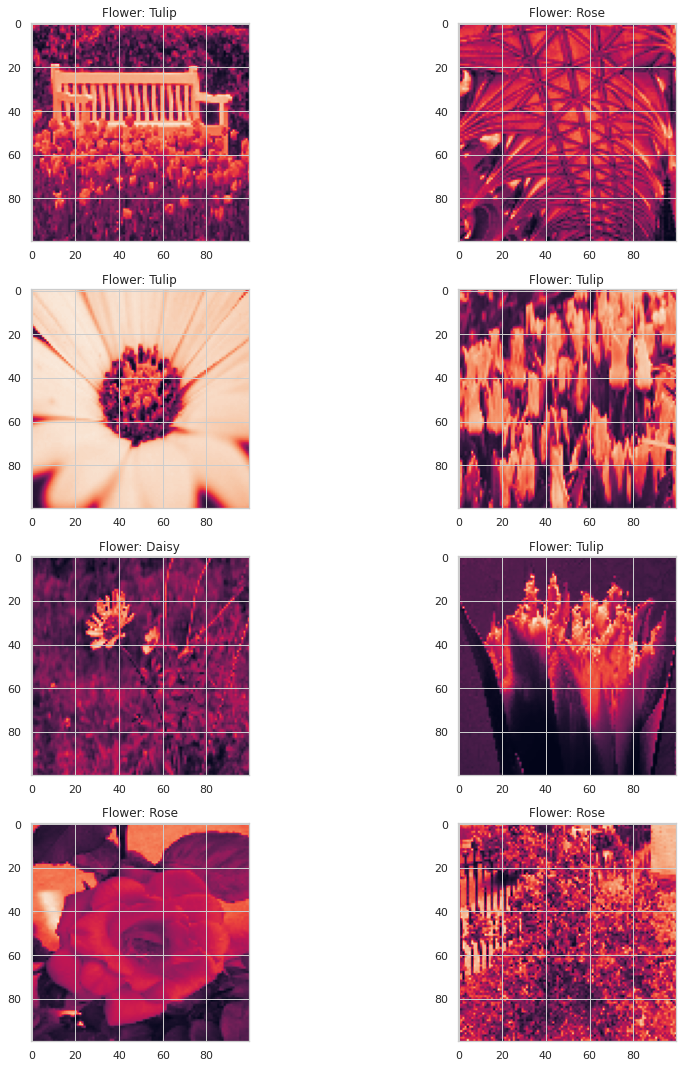

In [0]:
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

## Prepare data for training

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
X=np.array(X)
X=X/255

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2453, 100, 100)
(2453, 4)
(818, 100, 100)
(818, 4)


In [0]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(2453, 10000)
X_test = X_test.reshape(818, 10000)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (2453, 10000)
Test matrix shape (818, 10000)


# Keras training 

In [0]:
# define vars
input_num_units = 10000
hidden1_num_units = 5000
hidden2_num_units = 5000
hidden3_num_units = 5000
hidden4_num_units = 5000
hidden5_num_units = 500
output_num_units = 4

epochs = 20
batch_size = 64

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(1, 28, 28)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(X_train, Y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Train on 2453 samples, validate on 818 samples
Epoch 1/20
2453/2453 [==============================] - 2s 792us/step - loss: 1.3830 - accuracy: 0.2992 - val_loss: 1.3508 - val_accuracy: 0.3472
Epoch 2/20
2453/2453 [==============================] - 2s 712us/step - loss: 1.3593 - accuracy: 0.3278 - val_loss: 1.3613 - val_accuracy: 0.3240
Epoch 3/20
2453/2453 [==============================] - 2s 714us/step - loss: 1.3262 - accuracy: 0.3457 - val_loss: 1.3215 - val_accuracy: 0.3582
Epoch 4/20
2453/2453 [==============================] - 2s 716us/step - loss: 1.3026 - accuracy: 0.3620 - val_loss: 1.3334 - val_accuracy: 0.3142
Epoch 5/20
2453/2453 [==============================] - 2s 716us/step - loss: 1.2921 - accuracy: 0.3738 - val_loss: 1.3116 - val_accuracy: 0.3667
Epoch 6/20
2453/2453 [==============================] - 2s 715us/step - loss: 1.2857 - accuracy: 0.3852 - val_loss: 1.5509 - val_accuracy: 0.2885
Epoch 7/20
2453/2453 [==============================] - 2s 716us/step - loss:

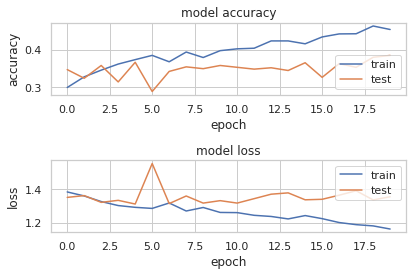

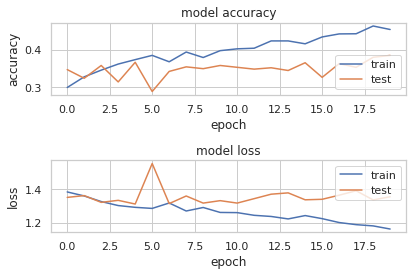

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# L2 Regularizer

In [0]:
from keras import regularizers

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(X_train, Y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Train on 2453 samples, validate on 818 samples
Epoch 1/20
2453/2453 [==============================] - 3s 1ms/step - loss: 1.1602 - accuracy: 0.7500 - val_loss: 0.5850 - val_accuracy: 0.7500
Epoch 2/20
2453/2453 [==============================] - 2s 921us/step - loss: 0.5674 - accuracy: 0.7500 - val_loss: 0.5653 - val_accuracy: 0.7500
Epoch 3/20
2453/2453 [==============================] - 2s 925us/step - loss: 0.5598 - accuracy: 0.7500 - val_loss: 0.5626 - val_accuracy: 0.7500
Epoch 4/20
2453/2453 [==============================] - 2s 925us/step - loss: 0.5595 - accuracy: 0.7500 - val_loss: 0.5649 - val_accuracy: 0.7500
Epoch 5/20
2453/2453 [==============================] - 2s 920us/step - loss: 0.5594 - accuracy: 0.7500 - val_loss: 0.5635 - val_accuracy: 0.7500
Epoch 6/20
2453/2453 [==============================] - 2s 925us/step - loss: 0.5592 - accuracy: 0.7500 - val_loss: 0.5639 - val_accuracy: 0.7500
Epoch 7/20
2453/2453 [==============================] - 2s 921us/step - loss: 0

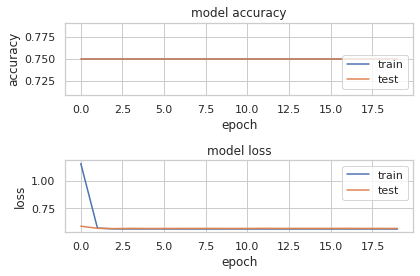

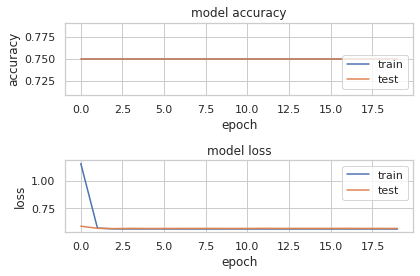

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# L1 Regularizer

In [0]:
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(X_train, Y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Train on 2453 samples, validate on 818 samples
Epoch 1/20
2453/2453 [==============================] - 3s 1ms/step - loss: 39.9367 - accuracy: 0.7500 - val_loss: 5.9150 - val_accuracy: 0.7500
Epoch 2/20
2453/2453 [==============================] - 2s 926us/step - loss: 3.3307 - accuracy: 0.7500 - val_loss: 2.3350 - val_accuracy: 0.7500
Epoch 3/20
2453/2453 [==============================] - 2s 926us/step - loss: 2.2011 - accuracy: 0.7500 - val_loss: 2.1333 - val_accuracy: 0.7500
Epoch 4/20
2453/2453 [==============================] - 2s 926us/step - loss: 2.1645 - accuracy: 0.7500 - val_loss: 2.1835 - val_accuracy: 0.7500
Epoch 5/20
2453/2453 [==============================] - 2s 927us/step - loss: 2.1656 - accuracy: 0.7500 - val_loss: 2.1431 - val_accuracy: 0.7500
Epoch 6/20
2453/2453 [==============================] - 2s 934us/step - loss: 2.1625 - accuracy: 0.7500 - val_loss: 2.2268 - val_accuracy: 0.7500
Epoch 7/20
2453/2453 [==============================] - 2s 932us/step - loss: 

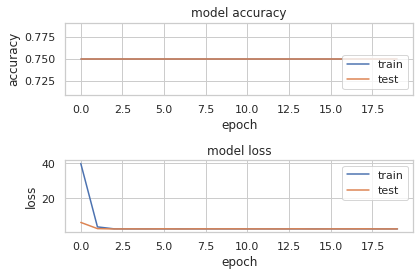

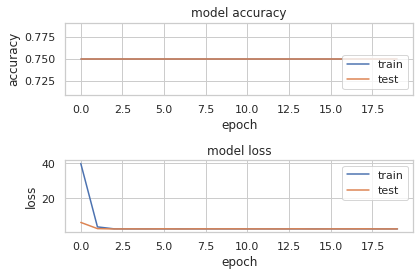

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Dropout and keras modeling

In [0]:
from keras.layers.core import Dropout
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(X_train, Y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Train on 2453 samples, validate on 818 samples
Epoch 1/20
2453/2453 [==============================] - 2s 860us/step - loss: 0.5620 - accuracy: 0.7478 - val_loss: 0.5578 - val_accuracy: 0.7500
Epoch 2/20
2453/2453 [==============================] - 2s 721us/step - loss: 0.5589 - accuracy: 0.7492 - val_loss: 0.5654 - val_accuracy: 0.7500
Epoch 3/20
2453/2453 [==============================] - 2s 724us/step - loss: 0.5489 - accuracy: 0.7510 - val_loss: 0.5467 - val_accuracy: 0.7531
Epoch 4/20
2453/2453 [==============================] - 2s 725us/step - loss: 0.5426 - accuracy: 0.7511 - val_loss: 0.5471 - val_accuracy: 0.7528
Epoch 5/20
2453/2453 [==============================] - 2s 721us/step - loss: 0.5424 - accuracy: 0.7507 - val_loss: 0.5530 - val_accuracy: 0.7537
Epoch 6/20
2453/2453 [==============================] - 2s 727us/step - loss: 0.5401 - accuracy: 0.7522 - val_loss: 0.5529 - val_accuracy: 0.7515
Epoch 7/20
2453/2453 [==============================] - 2s 726us/step - loss:

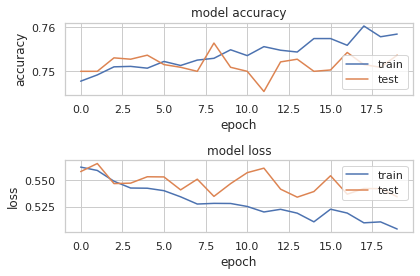

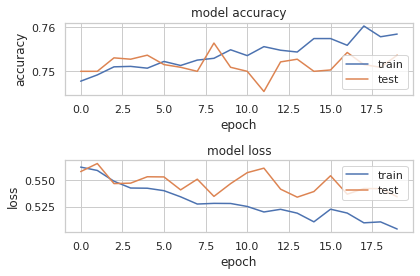

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Early stopping

In [0]:
from keras.callbacks import EarlyStopping
 

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(X_train, Y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, Y_test)
 , callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)])


Train on 2453 samples, validate on 818 samples
Epoch 1/20
2453/2453 [==============================] - 2s 858us/step - loss: 0.4981 - accuracy: 0.7658 - val_loss: 0.5401 - val_accuracy: 0.7518
Epoch 2/20
2453/2453 [==============================] - 2s 722us/step - loss: 0.4887 - accuracy: 0.7660 - val_loss: 0.5667 - val_accuracy: 0.7326
Epoch 3/20
2453/2453 [==============================] - 2s 724us/step - loss: 0.4868 - accuracy: 0.7673 - val_loss: 0.5608 - val_accuracy: 0.7393
Epoch 4/20
2453/2453 [==============================] - 2s 728us/step - loss: 0.4819 - accuracy: 0.7723 - val_loss: 0.5659 - val_accuracy: 0.7366
Epoch 5/20
2453/2453 [==============================] - 2s 729us/step - loss: 0.4781 - accuracy: 0.7745 - val_loss: 0.5498 - val_accuracy: 0.7451
Epoch 6/20
2453/2453 [==============================] - 2s 726us/step - loss: 0.4722 - accuracy: 0.7773 - val_loss: 0.6031 - val_accuracy: 0.7234


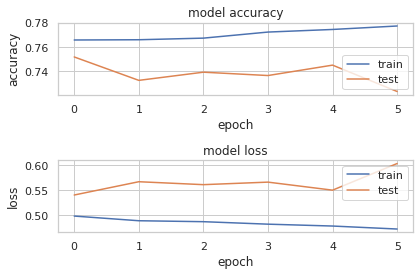

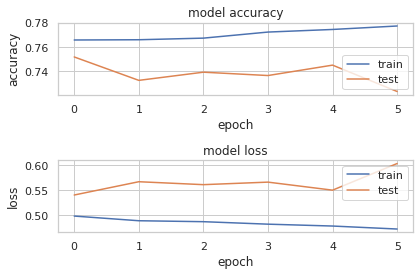

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig